# Muesli Data Analysis

## Pre-Setup

### Environment

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Read in data

In [80]:
df_orders = pd.read_excel("./data//Muesli Project raw data.xlsx",sheet_name="Orders",header=1)
df_campaign = pd.read_excel("./data//Muesli Project raw data.xlsx", sheet_name="Campaign Data")
df_order_process = pd.read_excel("./data//Muesli Project raw data.xlsx", sheet_name="Order Process Data")
df_interndata = pd.read_excel("./data//Muesli Project raw data.xlsx", sheet_name="InternData Study")

In [81]:
### Raw dataframes

In [82]:
df_orders.head(2)

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714


In [83]:
df_campaign.head(2)

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [84]:
df_order_process.head(2)

,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [85]:
df_interndata.head(2)

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


### Data cleaning function

In [86]:
def data_cleaning(df, df_type):
    
    # make col names lower
    df.columns = df.columns.str.lower()
    
   # orders data
    if df_type == "orders":
        # dropping cols
        df = df.drop(["index", "customer name", "origin channel", "category", "sub-category", "product id", "sales", "quantity", "discount", "profit"],axis=1)
        # dropping duplicates
        df = df.drop_duplicates()
        # renaming values in ship mode
        df["ship mode"] = df["ship mode"].str.replace(" Class","")
        df["ship mode"] = df["ship mode"].str.replace("Second","Standard")
        df["ship mode"] = df["ship mode"].str.replace("First","Express")
    
    # campaign data
    elif df_type == "campaign":
        # dropping cols
        df = df.drop("customer name", axis=1)
        # dropping duplicates
        pass

    # order process data    
    elif df_type == "order_process":
        # dropping cols
        df = df.drop("row id", axis=1)
        # dropping duplicates
        df = df.drop_duplicates()
        # dropping 1 duplicate row for id (scanned on truck twice)
        df = df.drop_duplicates(subset=["order id"], keep = "first")
        # dropping column order date, because 100% match with order date in orders data
        df = df.drop("order date", axis=1)
        # dropping column ship mode, because 100% match with ship mode in orders data (assumption: second class shipping = standard)
        df = df.drop("ship mode", axis=1)

    #intern data
    else:
        # dropping cols
        pass
        # dropping duplicates
        df = df.drop_duplicates()
        # dropping column pickup date, because 100% match with on truck scan date
        df = df.drop("pickup date", axis=1)

    

    return df

### Checks for cleaning function

#### Orders data

In [87]:
df_orders_1 = data_cleaning(df_orders,"orders")
df_orders_1

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region
0,CA-2019-121755,2019-01-16,Standard,EH-13945,United States,Los Angeles,California,90049.0,West
1,CA-2019-118255,2019-03-11,Express,ON-18715,United States,Eagan,Minnesota,55122.0,Central
2,CA-2019-169194,2019-06-20,Standard,LH-16900,United States,Dover,Delaware,19901.0,East
3,CA-2019-111682,2019-06-17,Express,TB-21055,United States,Troy,New York,12180.0,East
4,CA-2018-135545,2018-11-24,Standard,KM-16720,United States,Los Angeles,California,90004.0,West
...,...,...,...,...,...,...,...,...,...
9979,CA-2019-146913,2019-10-31,Standard,SF-20965,United States,San Francisco,California,94109.0,West
9980,US-2017-114377,2017-11-05,Express,BG-11035,United States,Hampton,Virginia,23666.0,South
9984,CA-2020-107209,2020-07-27,Standard,JW-15955,United States,Raleigh,North Carolina,27604.0,South
9986,US-2020-152842,2020-07-16,Standard,NF-18385,United States,Charlotte,North Carolina,28205.0,South


In [88]:
df_orders_1.duplicated().value_counts()

False    5009
Name: count, dtype: int64

In [89]:
df_orders_1["order id"].nunique()

5009

In [90]:
df_orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9988
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order id        5009 non-null   object        
 1   order date      5009 non-null   datetime64[ns]
 2   ship mode       5009 non-null   object        
 3   customer id     5009 non-null   object        
 4   country/region  5009 non-null   object        
 5   city            5009 non-null   object        
 6   state           5009 non-null   object        
 7   postal code     5003 non-null   float64       
 8   region          5009 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 391.3+ KB


#### Campaign data

In [91]:
df_campaign_1 = data_cleaning(df_campaign,"campaign")
df_campaign_1

,order id,arrival scan date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


In [92]:
df_campaign_1.duplicated().value_counts()

False    333
Name: count, dtype: int64

In [93]:
df_campaign_1["order id"].nunique()

333

In [94]:
df_campaign_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order id           333 non-null    object        
 1   arrival scan date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ KB


#### Order process data

In [95]:
df_order_process_1 = data_cleaning(df_order_process,"order_process")
df_order_process_1

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [96]:
df_order_process_1.duplicated().value_counts()

False    3002
Name: count, dtype: int64

In [97]:
df_order_process_1["order id"].duplicated().value_counts()

order id
False    3002
Name: count, dtype: int64

In [98]:
df_order_process_1.drop_duplicates("order id")

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [99]:
duplicates = df_order_process_1[df_order_process_1["order id"].duplicated(keep=False)]
duplicates

,order id,on truck scan date


In [100]:
df_order_process_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 5898
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            3002 non-null   object        
 1   on truck scan date  3002 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 70.4+ KB


#### Intern data

In [101]:
df_interndata_1 = data_cleaning(df_interndata,"intern")
df_interndata_1

,order id,ready to ship date
0,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05
5,CA-2019-158099,2019-09-05
...,...,...
283,US-2020-165456,2020-12-03
284,US-2020-110576,2020-12-04
285,CA-2020-105333,2020-12-04
288,CA-2020-119305,2020-12-04


In [102]:
df_interndata_1.duplicated().value_counts()

False    204
Name: count, dtype: int64

In [103]:
df_interndata_1["order id"].duplicated().value_counts()

order id
False    204
Name: count, dtype: int64

In [104]:
df_interndata_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 289
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            204 non-null    object        
 1   ready to ship date  204 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


#### Truck scan vs intern scan

In [105]:
#merged_truck = df_order_process_1.merge(df_interndata_1, on="order id", how="outer")
#merged_truck = merged_truck[["order id","on truck scan date","pickup date"]].dropna()
#merged_truck

In [106]:
#merged_truck["diff"] = merged_truck["on truck scan date"] - merged_truck["pickup date"]
#merged_truck

#### Order dates & shipping methods

In [107]:
#merged_op = df_orders_1.merge(df_order_process_1, on="order id", how="outer").dropna()

In [108]:
#merged_op[["order id","order date_x","ship mode_x","order date_y","ship mode_y"]]
#merged_op["date_diff"] = merged_op["order date_x"]-merged_op["order date_y"]
#merged_op["date_diff"].value_counts()

In [109]:
#merged_op

In [110]:
#merged_op[["order id","ship mode_x","ship mode_y"]]

In [111]:
#merged_op["ship mode_x"].value_counts()

In [112]:
#merged_op["ship mode_y"].value_counts()

In [113]:
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace(" Class","")
#merged_op["ship mode_y"] = merged_op["ship mode_y"].str.replace(" Processing","")
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace("Second","Standard")
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace("First","Express")

In [114]:
#merged_op[["order id","ship mode_x","ship mode_y"]]

In [115]:
#merged_op['match'] = merged_op['ship mode_x'] == merged_op['ship mode_y']
#merged_op['match'].value_counts()

## Cleaned dataframes

In [116]:
df_orders_cleaned = data_cleaning(df_orders,"orders")
df_campaign_cleaned = data_cleaning(df_campaign,"campaign")
df_order_process_cleaned = data_cleaning(df_order_process,"order_process")
df_interndata_cleaned = data_cleaning(df_interndata,"intern")

In [117]:
df_orders_cleaned.head(2)

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region
0,CA-2019-121755,2019-01-16,Standard,EH-13945,United States,Los Angeles,California,90049.0,West
1,CA-2019-118255,2019-03-11,Express,ON-18715,United States,Eagan,Minnesota,55122.0,Central


In [118]:
df_campaign_cleaned.head(2)

,order id,arrival scan date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03


In [119]:
df_order_process_cleaned.head(2)

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09


In [120]:
df_interndata_cleaned.head(2)

,order id,ready to ship date
0,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04


## Metrics

In [121]:
#Metrics to define
#o_date_2_processed : Jamil
#o_processes_2_truck: Janina
#o_truck_2_delivered : Jing
#o_date_2_delivered
#o_processed_2_delivered

# express_del = True/False
# weekday = 1-7 
# weekday_list= [monday, tuesday, wednesday, thursday, friday, saturday, sunday]

### O_truck_2_delivered calculation

#### Merging data

In [122]:
merged_o_truck_2_delivered=pd.merge(df_campaign_cleaned,df_order_process_cleaned, on='order id', how='inner' )

In [123]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date
0,CA-2019-109666,2019-05-03,2019-04-29
1,CA-2019-138933,2019-05-03,2019-04-29
2,CA-2019-130001,2019-05-03,2019-05-01
3,CA-2019-113061,2019-05-06,2019-04-29
4,CA-2019-162138,2019-05-06,2019-05-01
...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04
329,CA-2020-125381,2020-05-08,2020-05-01
330,CA-2020-141733,2020-05-15,2020-05-13
331,US-2020-104451,2020-05-15,2020-05-13


In [124]:
merged_o_truck_2_delivered = pd.merge(
    merged_o_truck_2_delivered,
    df_orders_cleaned[['order id', 'ship mode']],  # include key + column you want
    on='order id',
    how='inner'
)

In [125]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode
0,CA-2019-109666,2019-05-03,2019-04-29,Standard
1,CA-2019-138933,2019-05-03,2019-04-29,Express
2,CA-2019-130001,2019-05-03,2019-05-01,Standard
3,CA-2019-113061,2019-05-06,2019-04-29,Standard
4,CA-2019-162138,2019-05-06,2019-05-01,Standard
...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard
329,CA-2020-125381,2020-05-08,2020-05-01,Standard
330,CA-2020-141733,2020-05-15,2020-05-13,Standard
331,US-2020-104451,2020-05-15,2020-05-13,Standard


#### checking na data

In [126]:
merged_o_truck_2_delivered.isna().sum()

order id              0
arrival scan date     0
on truck scan date    0
ship mode             0
dtype: int64

#### calculating time interval between on truck scan date and arrival scan date

In [127]:
merged_o_truck_2_delivered['time interval']=merged_o_truck_2_delivered['arrival scan date']-merged_o_truck_2_delivered['on truck scan date']

In [128]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days
...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days


#### extracting the days for arrival date

In [129]:
merged_o_truck_2_delivered["arrival year"]= merged_o_truck_2_delivered["arrival scan date"].dt.year
merged_o_truck_2_delivered["arrival month"]= merged_o_truck_2_delivered["arrival scan date"].dt.month
merged_o_truck_2_delivered["arrival day"]= merged_o_truck_2_delivered["arrival scan date"].dt.dayofweek

In [130]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,4
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,0
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,0
...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,4
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,4
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,4


In [131]:
merged_o_truck_2_delivered['arrival day'].value_counts()

arrival day
0    215
1     40
4     39
2     20
3     19
Name: count, dtype: int64

#### transforming arrival day into weekdays and weekend dates

In [132]:
arrival_day_categories={0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'friday', 6:'saturday', 7:'sunday'}
merged_o_truck_2_delivered['arrival day']=merged_o_truck_2_delivered['arrival day'].map(arrival_day_categories)
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday
...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday


#### extracting the days for on truck scan date

In [133]:
merged_o_truck_2_delivered["on truck year"]= merged_o_truck_2_delivered["on truck scan date"].dt.year
merged_o_truck_2_delivered["on truck month"]= merged_o_truck_2_delivered["on truck scan date"].dt.month
merged_o_truck_2_delivered["on truck day"]= merged_o_truck_2_delivered["on truck scan date"].dt.dayofweek

In [134]:
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,0
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,0
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,0
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,2
...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,0
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,4
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,2


In [135]:
merged_o_truck_2_delivered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order id            333 non-null    object         
 1   arrival scan date   333 non-null    datetime64[ns] 
 2   on truck scan date  333 non-null    datetime64[ns] 
 3   ship mode           333 non-null    object         
 4   time interval       333 non-null    timedelta64[ns]
 5   arrival year        333 non-null    int32          
 6   arrival month       333 non-null    int32          
 7   arrival day         333 non-null    object         
 8   on truck year       333 non-null    int32          
 9   on truck month      333 non-null    int32          
 10  on truck day        333 non-null    int32          
dtypes: datetime64[ns](2), int32(5), object(3), timedelta64[ns](1)
memory usage: 22.2+ KB


In [136]:
merged_o_truck_2_delivered['actual duration']=merged_o_truck_2_delivered['time interval'].dt.days

In [137]:
merged_o_truck_2_delivered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order id            333 non-null    object         
 1   arrival scan date   333 non-null    datetime64[ns] 
 2   on truck scan date  333 non-null    datetime64[ns] 
 3   ship mode           333 non-null    object         
 4   time interval       333 non-null    timedelta64[ns]
 5   arrival year        333 non-null    int32          
 6   arrival month       333 non-null    int32          
 7   arrival day         333 non-null    object         
 8   on truck year       333 non-null    int32          
 9   on truck month      333 non-null    int32          
 10  on truck day        333 non-null    int32          
 11  actual duration     333 non-null    int64          
dtypes: datetime64[ns](2), int32(5), int64(1), object(3), timedelta64[ns](1)
memory usage: 24.8+ 

In [138]:
merged_o_truck_2_delivered['on truck day'].value_counts()

on truck day
2    199
4     78
0     46
1     10
Name: count, dtype: int64

#### transforming on truck scan date into weekdays and weekends date

In [139]:
on_truck_day_categories={0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'friday', 6:'saturday', 7:'sunday'}
merged_o_truck_2_delivered['on truck day']=merged_o_truck_2_delivered['on truck day'].map(on_truck_day_categories)
merged_o_truck_2_delivered

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,monday,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,monday,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,wednesday,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,monday,7
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,wednesday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,monday,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,friday,7
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2


In [140]:
merged_o_truck_2_delivered['on truck day'].value_counts()

on truck day
wednesday    199
friday        78
monday        46
tuesday       10
Name: count, dtype: int64

In [141]:
merged_o_truck_2_delivered['arrival day'].value_counts()

arrival day
monday       215
tuesday       40
friday        39
wednesday     20
thursday      19
Name: count, dtype: int64

#### calculating the average actual duration of on truck to delivery 

In [142]:
result_on_truck=merged_o_truck_2_delivered.groupby(['ship mode','on truck day'])['actual duration'].mean().round(2).reset_index()

In [143]:
result_on_truck

,ship mode,on truck day,actual duration
0,Express,friday,3.79
1,Express,monday,4.88
2,Express,tuesday,5.33
3,Express,wednesday,4.86
4,Standard,friday,4.12
5,Standard,monday,4.33
6,Standard,tuesday,5.00
7,Standard,wednesday,4.83


In [144]:
result_on_truck["expected duration"] = [3, 3, 2, 4, 3, 3, 4, 4]

In [145]:
result_on_truck

,ship mode,on truck day,actual duration,expected duration
0,Express,friday,3.79,3
1,Express,monday,4.88,3
2,Express,tuesday,5.33,2
3,Express,wednesday,4.86,4
4,Standard,friday,4.12,3
5,Standard,monday,4.33,3
6,Standard,tuesday,5.00,4
7,Standard,wednesday,4.83,4


In [146]:
result_arrival=merged_o_truck_2_delivered.groupby(['ship mode','arrival day'])['actual duration'].mean().round(2).reset_index()

In [147]:
result_arrival

,ship mode,arrival day,actual duration
0,Express,friday,3.30
1,Express,monday,4.64
2,Express,thursday,3.60
3,Express,tuesday,4.82
4,Express,wednesday,5.29
5,Standard,friday,3.34
6,Standard,monday,4.90
7,Standard,thursday,3.79
8,Standard,tuesday,4.86
9,Standard,wednesday,4.54


In [148]:
result_arrival["expected duration"] = [3, 3, 2, 4, 4, 3, 3, 4, 4, 3]

In [149]:
result_arrival

,ship mode,arrival day,actual duration,expected duration
0,Express,friday,3.30,3
1,Express,monday,4.64,3
2,Express,thursday,3.60,2
3,Express,tuesday,4.82,4
4,Express,wednesday,5.29,4
5,Standard,friday,3.34,3
6,Standard,monday,4.90,3
7,Standard,thursday,3.79,4
8,Standard,tuesday,4.86,4
9,Standard,wednesday,4.54,3


In [150]:
result_on_truck.query("`ship mode` == 'Standard'")

,ship mode,on truck day,actual duration,expected duration
4,Standard,friday,4.12,3
5,Standard,monday,4.33,3
6,Standard,tuesday,5.00,4
7,Standard,wednesday,4.83,4


In [151]:
merged_o_truck_2_delivered_weekdays_on_truck = merged_o_truck_2_delivered.query(
    "`on truck day` in ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']"
)


In [152]:
merged_o_truck_2_delivered_weekdays_on_truck

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,monday,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,monday,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,wednesday,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,monday,7
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,wednesday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,monday,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,friday,7
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2


In [153]:
average_actual_duration_weekdays_on_truck= merged_o_truck_2_delivered_weekdays_on_truck.groupby('ship mode')['actual duration'].mean().round(2)

In [154]:
average_actual_duration_weekdays_on_truck

ship mode
Express     4.48
Standard    4.64
Name: actual duration, dtype: float64

In [155]:
merged_o_truck_2_delivered_weekdays_arrival = merged_o_truck_2_delivered.query(
    "`arrival day` in ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']"
)

In [156]:
merged_o_truck_2_delivered_weekdays_arrival

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration
0,CA-2019-109666,2019-05-03,2019-04-29,Standard,4 days,2019,5,friday,2019,4,monday,4
1,CA-2019-138933,2019-05-03,2019-04-29,Express,4 days,2019,5,friday,2019,4,monday,4
2,CA-2019-130001,2019-05-03,2019-05-01,Standard,2 days,2019,5,friday,2019,5,wednesday,2
3,CA-2019-113061,2019-05-06,2019-04-29,Standard,7 days,2019,5,monday,2019,4,monday,7
4,CA-2019-162138,2019-05-06,2019-05-01,Standard,5 days,2019,5,monday,2019,5,wednesday,5
...,...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-05-08,2020-05-04,Standard,4 days,2020,5,friday,2020,5,monday,4
329,CA-2020-125381,2020-05-08,2020-05-01,Standard,7 days,2020,5,friday,2020,5,friday,7
330,CA-2020-141733,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2
331,US-2020-104451,2020-05-15,2020-05-13,Standard,2 days,2020,5,friday,2020,5,wednesday,2


In [157]:
merged_o_truck_2_delivered_weekends_arrival= merged_o_truck_2_delivered.query(
    "`arrival day` in ['saturday', 'sunday']")

In [158]:
merged_o_truck_2_delivered_weekends_arrival

,order id,arrival scan date,on truck scan date,ship mode,time interval,arrival year,arrival month,arrival day,on truck year,on truck month,on truck day,actual duration


In [159]:
average_actual_duration_weekdays_arrival= merged_o_truck_2_delivered_weekdays_arrival.groupby('ship mode')['actual duration'].mean().round(2)

In [160]:
average_actual_duration_weekdays_arrival

ship mode
Express     4.48
Standard    4.64
Name: actual duration, dtype: float64

/var/folders/sc/3s_b29hx6kz96y_6tzpvlnfm0000gn/T/ipykernel_83515/3869407665.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


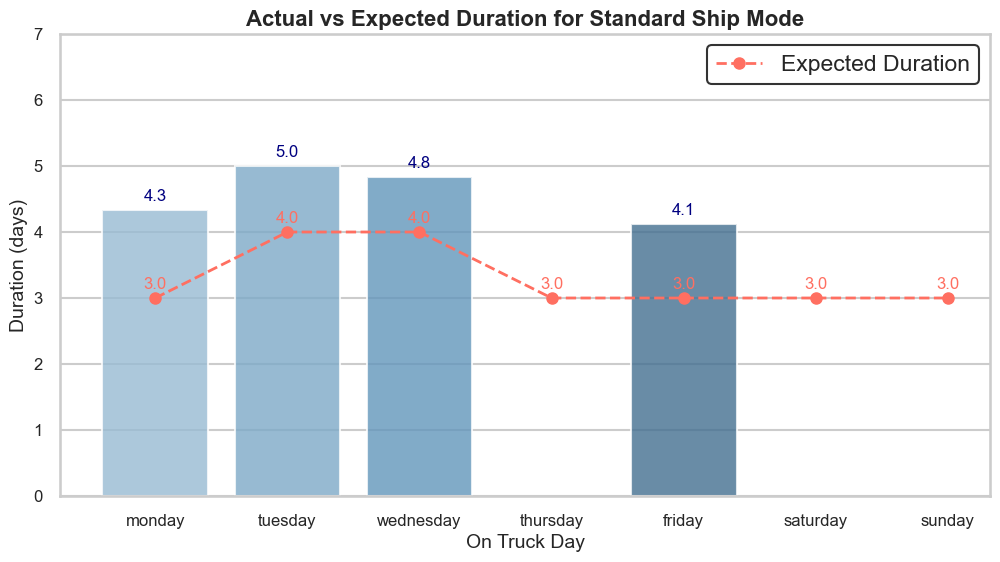

In [161]:
# Data including missing days
standard_data = pd.DataFrame({
    "on_truck_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.33, 5.00, 4.83, None, 4.12, None, None],  # actual durations
    "expected duration normal": [3, 4, 4, 3, 3, 3, 3]  # expected durations
})

day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="on_truck_day",
    y="actual duration",
    data=standard_data,
    palette="Blues_d",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as dashed line with points
plt.plot(
    day_order,
    standard_data["expected duration normal"],
    color="#FF6F61",  # soft red
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate bars with actual duration
for i, val in enumerate(standard_data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='navy')

# Annotate expected durations on points
for i, val in enumerate(standard_data["expected duration normal"]):
    plt.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

# Labels and title
plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("On Truck Day", fontsize=14)
plt.title("Actual vs Expected Duration for Standard Ship Mode", fontsize=16, weight='bold')
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(standard_data["actual duration"].max(), max(standard_data["expected duration normal"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Standard Ship Mode for On Truck', dpi=300, bbox_inches='tight')

plt.show()


In [162]:
result_arrival.query("`ship mode` == 'Standard'")

,ship mode,arrival day,actual duration,expected duration
5,Standard,friday,3.34,3
6,Standard,monday,4.90,3
7,Standard,thursday,3.79,4
8,Standard,tuesday,4.86,4
9,Standard,wednesday,4.54,3


/var/folders/sc/3s_b29hx6kz96y_6tzpvlnfm0000gn/T/ipykernel_83515/1207232642.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


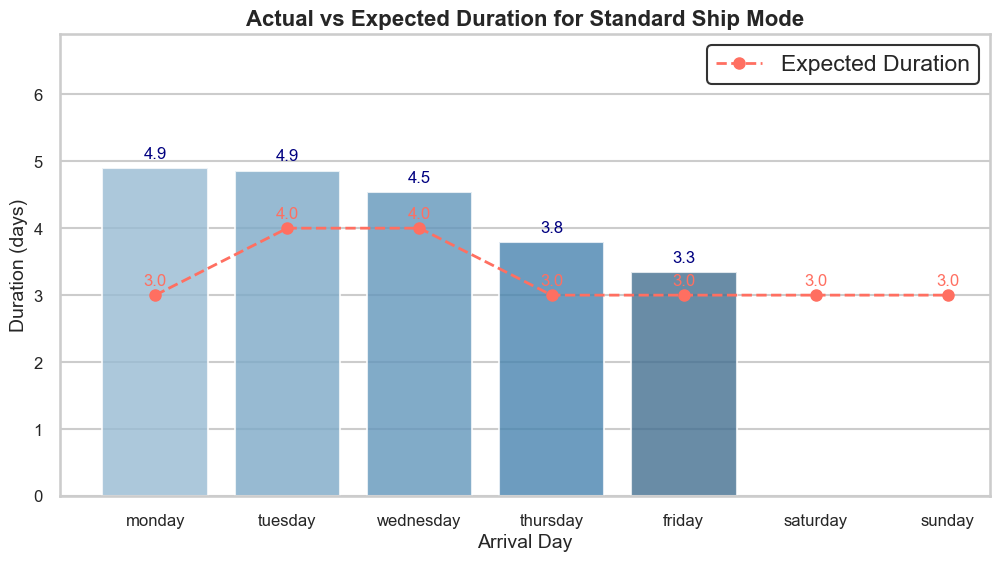

In [163]:
# Data including missing days
standard_data = pd.DataFrame({
    "arrival_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.90, 4.86, 4.54, 3.79, 3.34, None, None],  # actual durations
    "expected duration normal": [3, 4, 4, 3, 3, 3, 3]  # expected durations
})

day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="arrival_day",
    y="actual duration",
    data=standard_data,
    palette="Blues_d",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as dashed line with points
plt.plot(
    day_order,
    standard_data["expected duration normal"],
    color="#FF6F61",  # soft red
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate bars with actual duration
for i, val in enumerate(standard_data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='navy')

# Annotate expected durations on points
for i, val in enumerate(standard_data["expected duration normal"]):
    plt.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

# Labels and title
plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("Arrival Day", fontsize=14)
plt.title("Actual vs Expected Duration for Standard Ship Mode", fontsize=16, weight='bold')
plt.legend(frameon=True, facecolor='white', edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(standard_data["actual duration"].max(), max(standard_data["expected duration normal"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Standard Ship Mode for Arrival Day', dpi=300, bbox_inches='tight')

plt.show()

In [164]:
result_on_truck.query("`ship mode` == 'Express'")

,ship mode,on truck day,actual duration,expected duration
0,Express,friday,3.79,3
1,Express,monday,4.88,3
2,Express,tuesday,5.33,2
3,Express,wednesday,4.86,4


/var/folders/sc/3s_b29hx6kz96y_6tzpvlnfm0000gn/T/ipykernel_83515/489017136.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


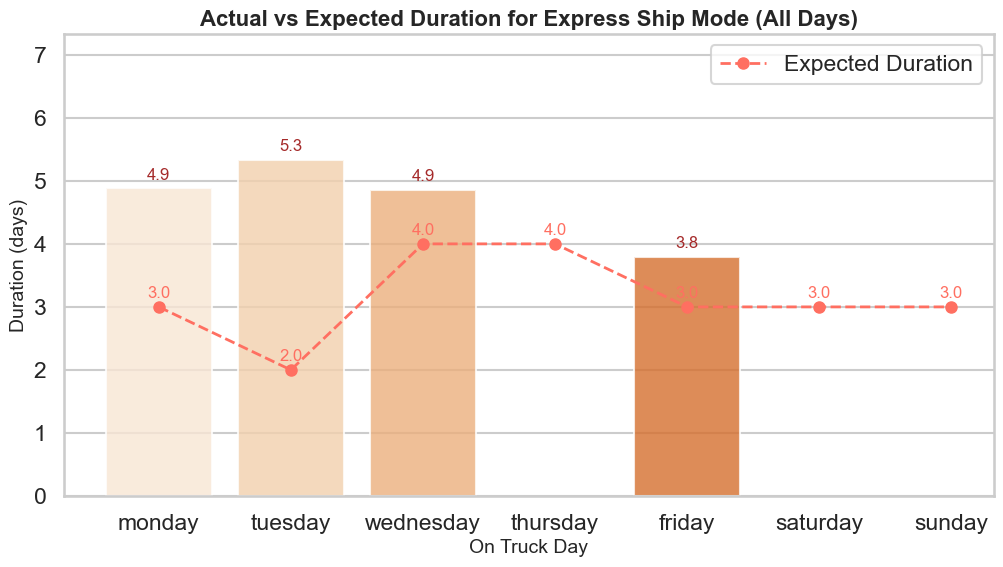

In [165]:
# Data including all days
data = pd.DataFrame({
    "ship_mode": ["Express"]*7,
    "on_truck_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.88, 5.33, 4.86, None, 3.79, None, None],  # actual durations
    "expected_duration": [3, 2, 4, 4, 3, 3, 3]  # expected durations
})

# Define the full day order
day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="on_truck_day",
    y="actual duration",
    data=data,
    palette="Oranges",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as line with points
plt.plot(
    day_order,
    data["expected_duration"],
    color="#FF6F61",  # red for expected
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate actual durations
for i, val in enumerate(data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='brown')

# Annotate expected durations
for i, val in enumerate(data["expected_duration"]):
    bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("On Truck Day", fontsize=14)
plt.title("Actual vs Expected Duration for Express Ship Mode (All Days)", fontsize=16, weight='bold')
plt.legend()
plt.ylim(0, max(data["actual duration"].max(skipna=True), max(data["expected_duration"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Express Ship Mode for On Truck', dpi=300, bbox_inches='tight')

plt.show()



In [166]:
result_arrival.query("`ship mode` == 'Express'")

,ship mode,arrival day,actual duration,expected duration
0,Express,friday,3.30,3
1,Express,monday,4.64,3
2,Express,thursday,3.60,2
3,Express,tuesday,4.82,4
4,Express,wednesday,5.29,4


/var/folders/sc/3s_b29hx6kz96y_6tzpvlnfm0000gn/T/ipykernel_83515/3757862092.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


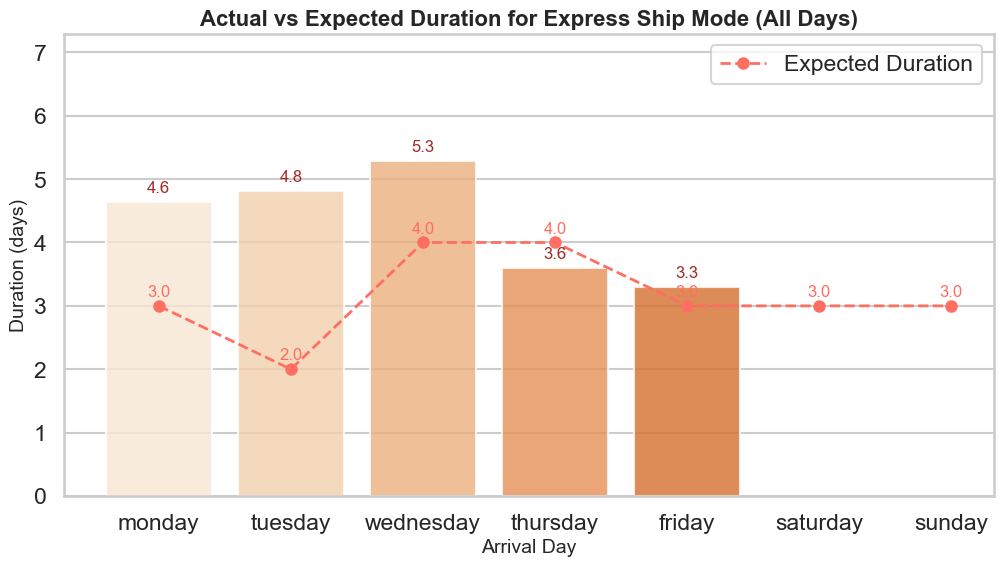

In [167]:
# Data including all days
data = pd.DataFrame({
    "ship_mode": ["Express"]*7,
    "arrival_day": ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"],
    "actual duration": [4.64, 4.82, 5.29, 3.60, 3.30, None, None],  # actual durations
    "expected_duration": [3, 2, 4, 4, 3, 3, 3]  # expected durations
})

# Define the full day order
day_order = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.set_context("talk")

# Barplot for actual duration
bars = sns.barplot(
    x="arrival_day",
    y="actual duration",
    data=data,
    palette="Oranges",
    order=day_order,
    alpha=0.8
)

# Overlay expected duration as line with points
plt.plot(
    day_order,
    data["expected_duration"],
    color="#FF6F61",  # red for expected
    marker="o",
    linestyle="--",
    linewidth=2,
    markersize=8,
    label="Expected Duration"
)

# Annotate actual durations
for i, val in enumerate(data["actual duration"]):
    if val is not None:
        bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='brown')

# Annotate expected durations
for i, val in enumerate(data["expected_duration"]):
    bars.text(i, val + 0.1, f"{val:.1f}", ha='center', va='bottom', fontsize=12, color='#FF6F61')

plt.ylabel("Duration (days)", fontsize=14)
plt.xlabel("Arrival Day", fontsize=14)
plt.title("Actual vs Expected Duration for Express Ship Mode (All Days)", fontsize=16, weight='bold')
plt.legend()
plt.ylim(0, max(data["actual duration"].max(skipna=True), max(data["expected_duration"])) + 2)

# Save figure
plt.savefig('Actual vs Expected Duration for Express Ship Mode for Arrival Day', dpi=300, bbox_inches='tight')

plt.show()

In [168]:
average_actual_duration_weekdays_on_truck

ship mode
Express     4.48
Standard    4.64
Name: actual duration, dtype: float64

In [184]:
average_actual_duration_weekdays_arrival

ship mode
Express     4.48
Standard    4.64
Name: actual duration, dtype: float64

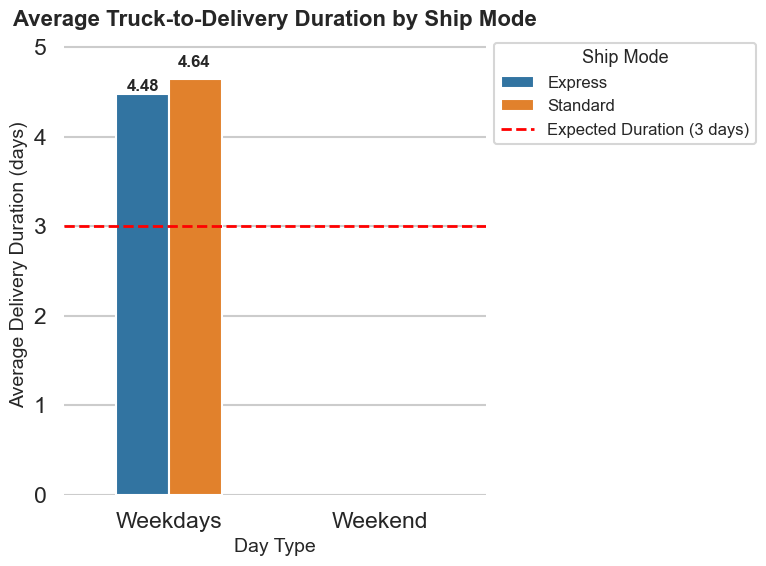

In [185]:
# Dataset
data = {
    'Day Type': ['Weekdays', 'Weekend'],
    'Express': [4.48, None],
    'Standard': [4.64, None]
}
df = pd.DataFrame(data)

# Melt for seaborn
df_melted = df.melt(
    id_vars='Day Type',
    value_vars=['Express', 'Standard'],
    var_name='Ship Mode',
    value_name='Average Duration'
)

# Color palette
palette = {'Express': '#1f77b4', 'Standard': '#ff7f0e'}

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='Day Type',
    y='Average Duration',
    hue='Ship Mode',
    data=df_melted,
    palette=palette,
    dodge=True,
    width=0.5
)

# Horizontal line for expected duration
plt.axhline(3, color='red', linestyle='--', linewidth=2, label='Expected Duration (3 days)')

# Add labels above bars with stagger and increased horizontal shift for Standard
stagger_amount = 0.1  # vertical offset to separate labels
horizontal_shift = 0.12  # increased horizontal offset for Standard

for p, (_, row) in zip(ax.patches, df_melted.iterrows()):
    val = row['Average Duration']
    if pd.notna(val):
        x = p.get_x() + p.get_width() / 2.
        y = val + stagger_amount if row['Ship Mode'] == 'Standard' else val
        # Shift Standard further to the right
        if row['Ship Mode'] == 'Standard':
            x += horizontal_shift
        ax.annotate(f"{val:.2f}",
                    (x, y),
                    ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

# Style tweaks
plt.ylabel("Average Delivery Duration (days)", fontsize=14)
plt.xlabel("Day Type", fontsize=14)
plt.title("Average Truck-to-Delivery Duration by Ship Mode", fontsize=16, fontweight='bold')
plt.ylim(0, max(df_melted['Average Duration'].dropna()) + 0.5)

# Legend outside
plt.legend(title='Ship Mode', loc='upper left', bbox_to_anchor=(1,1), fontsize=12, title_fontsize=13)
sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.savefig('Actual_Truck-to-Delivery_Duration_by_Ship_Mode.png', dpi=300, bbox_inches='tight')

plt.show()


